📁 相似度矩阵已保存: /home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/CWT_cosine_silimar/CWT_cosine_silimar.csv


/tmp/ipykernel_9517/3404770371.py:58: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/3404770371.py:58: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/3404770371.py:58: UserWarning: Glyph 20313 (\N{CJK UNIFIED IDEOGRAPH-4F59}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/3404770371.py:58: UserWarning: Glyph 24358 (\N{CJK UNIFIED IDEOGRAPH-5F26}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/3404770371.py:58: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/3404770371.py:58: UserWarning: Glyph 20284 (\N{CJK UNIFIED IDEOGRAPH-4F3C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/3404770371.py:58: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}

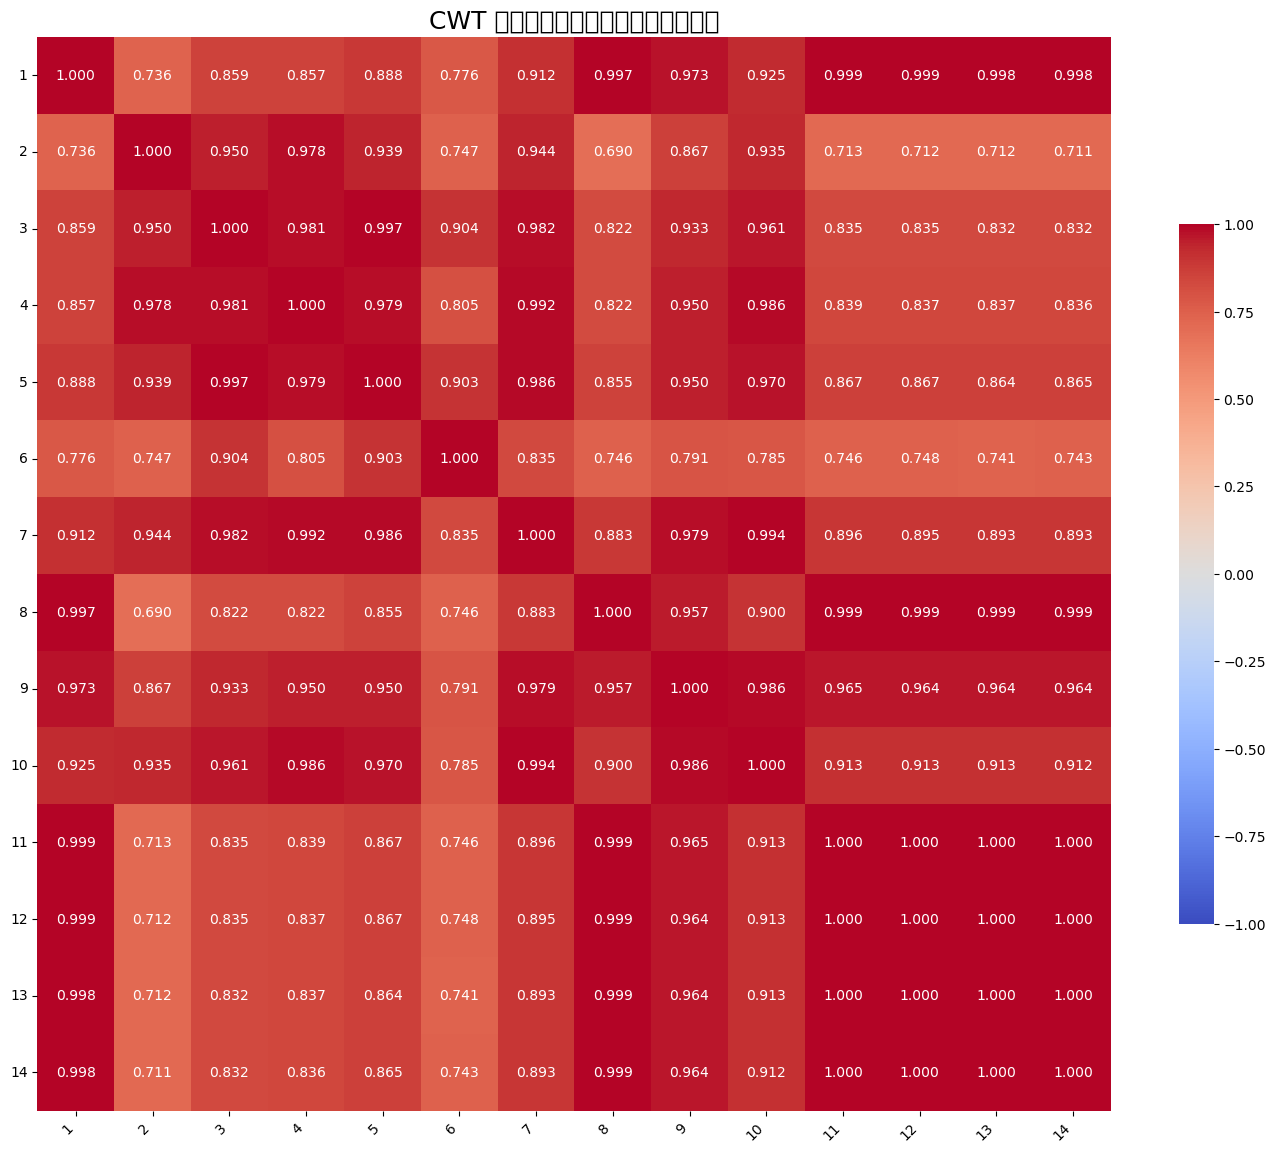

📁 热力图（带数字）已保存: /home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/CWT_cosine_silimar/CWT_similarity_heatmap_with_numbers.png


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ====================== 1. 路径 ======================
train_path = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/train/train_CWT.csv"
val_path   = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/val/val_CWT.csv"
test_path  = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/test/test_CWT.csv"

save_csv = "/home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/CWT_cosine_silimar/CWT_cosine_silimar.csv"
save_fig = "/home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/CWT_cosine_silimar/CWT_similarity_heatmap_with_numbers.png"

os.makedirs(os.path.dirname(save_fig), exist_ok=True)

# ====================== 2. 读取数据 ======================
df_train = pd.read_csv(train_path)
df_val   = pd.read_csv(val_path)
df_test  = pd.read_csv(test_path)
df = pd.concat([df_train, df_val, df_test], axis=0).reset_index(drop=True)

# ====================== 3. 特征 ======================
feature_cols = df.columns[1:-1]      # 第一列不要
label_col = df.columns[-1]
X = df[feature_cols].values
y = df[label_col].values

# ====================== 4. 类别均值 ======================
class_means = {}
for cls in np.unique(y):
    class_means[cls] = X[y == cls].mean(axis=0)

# ====================== 5. 相似度矩阵 ======================
classes = sorted(class_means.keys())
mean_matrix = np.vstack([class_means[c] for c in classes])
similarity_matrix = cosine_similarity(mean_matrix)
sim_df = pd.DataFrame(similarity_matrix, index=classes, columns=classes)

sim_df.to_csv(save_csv)
print(f"📁 相似度矩阵已保存: {save_csv}")

# ====================== 6. 画热力图（带数字） ======================
plt.figure(figsize=(14, 12))
sns.heatmap(
    sim_df.round(3),        # 保留三位小数
    annot=True,             # 显示数字
    fmt=".3f",              # 数字格式
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": .6},
    vmin=-1, vmax=1
)
plt.title("CWT 类别余弦相似度热力图（带数值）", fontsize=18)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(save_fig, dpi=300)
plt.show()

print(f"📁 热力图（带数字）已保存: {save_fig}")


# PCA 主成分分析

📌 数据维度： (2730, 124)


/tmp/ipykernel_9517/4116069243.py:42: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:42: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:42: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:42: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:42: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:42: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:42: UserWarning: Glyph 37322 (\N{CJK UNIFIED IDEOGRAPH-91CA}

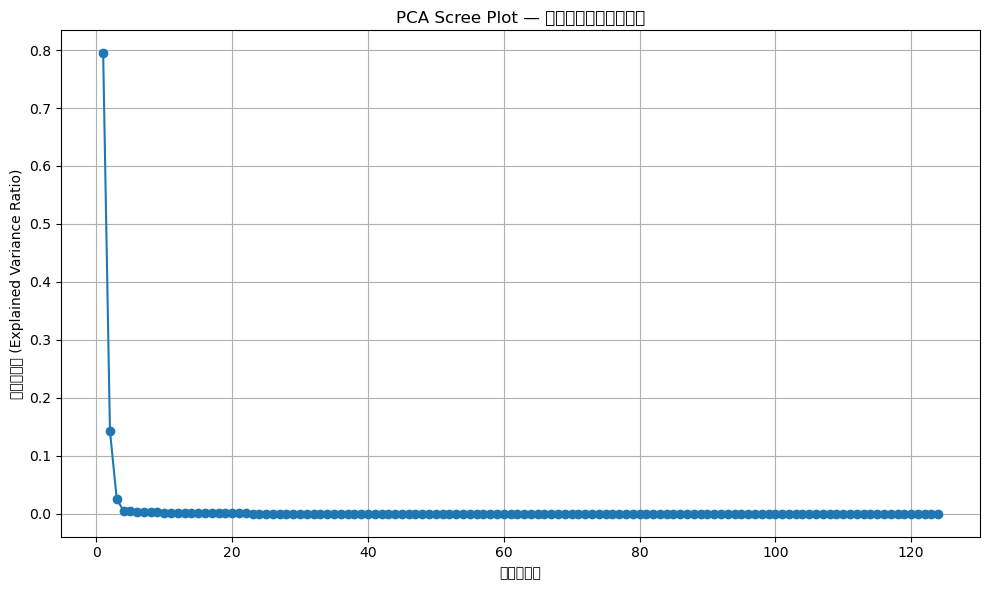

/tmp/ipykernel_9517/4116069243.py:56: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:56: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:56: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:56: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:56: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:56: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:56: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}

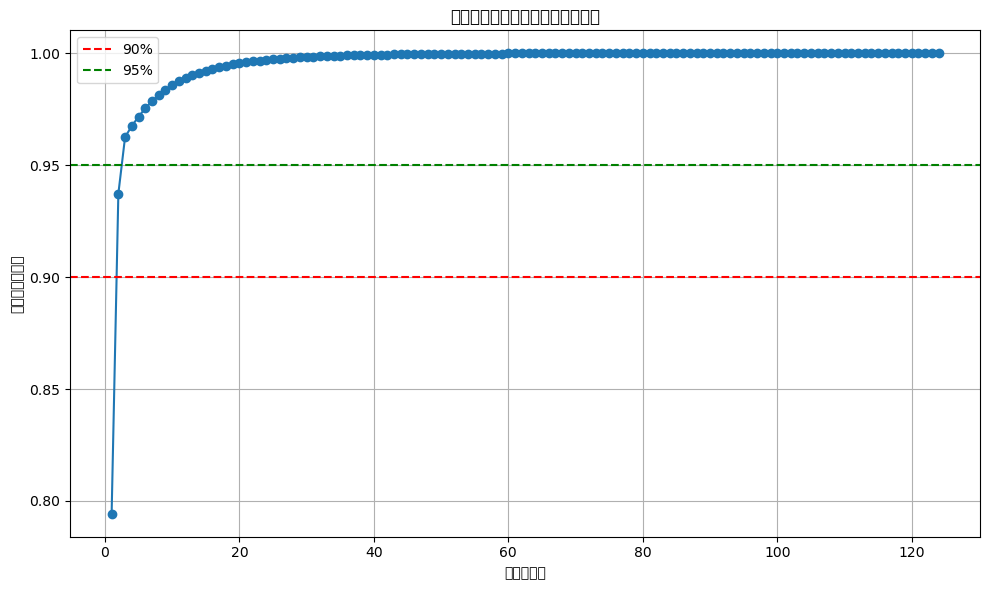

/tmp/ipykernel_9517/4116069243.py:70: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:70: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:70: UserWarning: Glyph 32500 (\N{CJK UNIFIED IDEOGRAPH-7EF4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:70: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:70: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:70: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9517/4116069243.py:70: UserWarning: Glyph 23610 (\N{CJK UNIFIED IDEOGRAPH-5C3A}

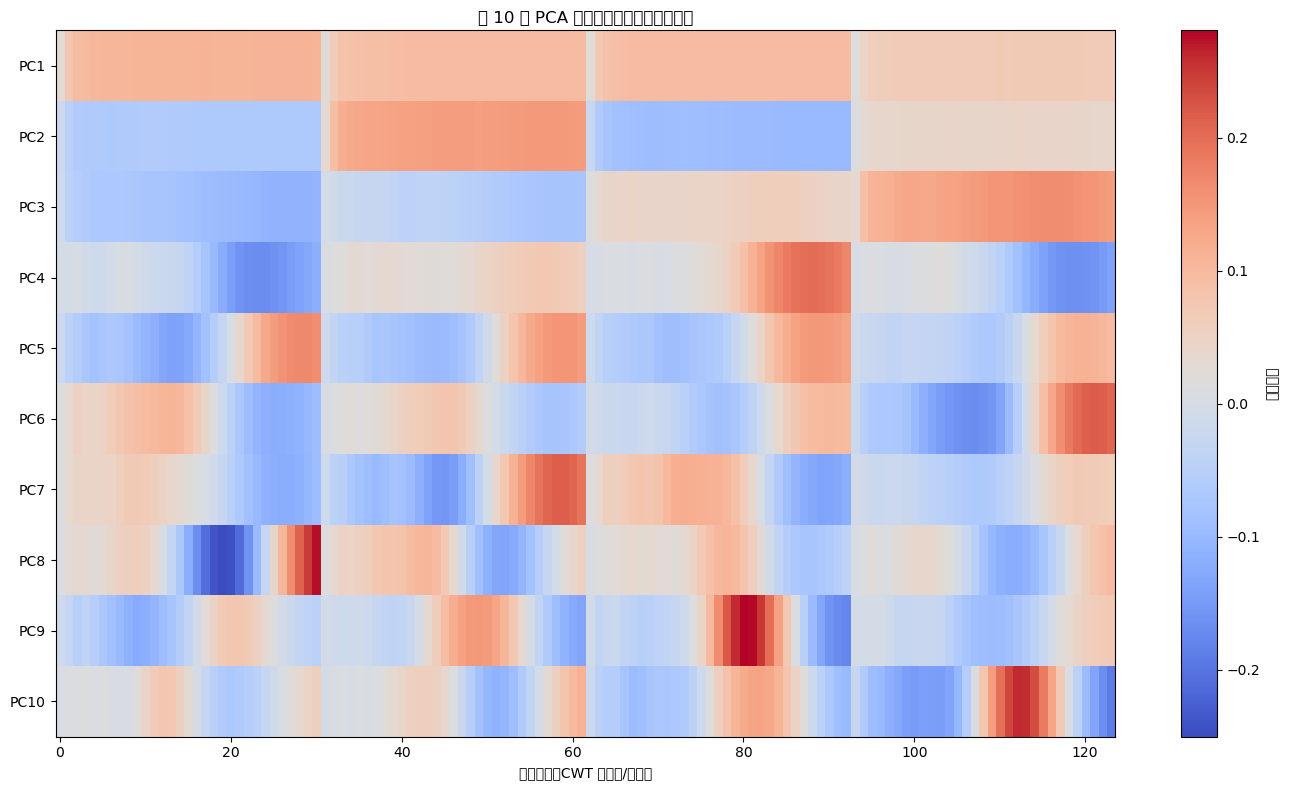

📁 所有 PCA 图已保存到目录： /home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/PCA


In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

# ====================== 路径 ======================
train_path = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/train/train_CWT.csv"
val_path   = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/val/val_CWT.csv"
test_path  = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/test/test_CWT.csv"

save_dir = "/home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/PCA"
os.makedirs(save_dir, exist_ok=True)

# ====================== 1. 加载数据 ======================
df = pd.concat([
    pd.read_csv(train_path),
    pd.read_csv(val_path),
    pd.read_csv(test_path)
], axis=0).reset_index(drop=True)

feature_cols = df.columns[1:-1]   # 第一列不要，最后一列是标签
X = df[feature_cols].values
labels = df[df.columns[-1]].values

print("📌 数据维度：", X.shape)

# ====================== 2. PCA ======================
pca = PCA(n_components=min(200, X.shape[1]))  # 降到 200 或特征维度
pca.fit(X)

explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

# ====================== 3. Scree Plot ======================
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o')
plt.title("PCA Scree Plot — 每个主成分的解释方差")
plt.xlabel("主成分序号")
plt.ylabel("解释方差比 (Explained Variance Ratio)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "PCA_scree_plot.png"), dpi=300)
plt.show()

# ====================== 4. 累计解释方差 ======================
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_explained_var) + 1), cum_explained_var, marker='o')
plt.axhline(0.9, color='r', linestyle='--', label='90%')
plt.axhline(0.95, color='g', linestyle='--', label='95%')
plt.title("累计解释方差（判断需要多少维）")
plt.xlabel("主成分序号")
plt.ylabel("累计解释方差比")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "PCA_cumulative_variance.png"), dpi=300)
plt.show()

# ====================== 5. 查看前 10 个主成分的特征贡献 ======================
num_components = 10
components = pca.components_[:num_components]

plt.figure(figsize=(14, 8))
plt.imshow(components, aspect='auto', cmap='coolwarm')
plt.colorbar(label="权重大小")
plt.yticks(range(num_components), [f"PC{i+1}" for i in range(num_components)])
plt.xlabel("特征维度（CWT 的尺度/时间）")
plt.title("前 10 个 PCA 主成分的特征贡献权重矩阵")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "PCA_top_components_weights.png"), dpi=300)
plt.show()

print("📁 所有 PCA 图已保存到目录：", save_dir)


# UMAP 协方差椭球

🔍 正在进行 3D UMAP 降维 ...


/home/charles/miniconda3/envs/d2l/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP 完成： (2730, 3)


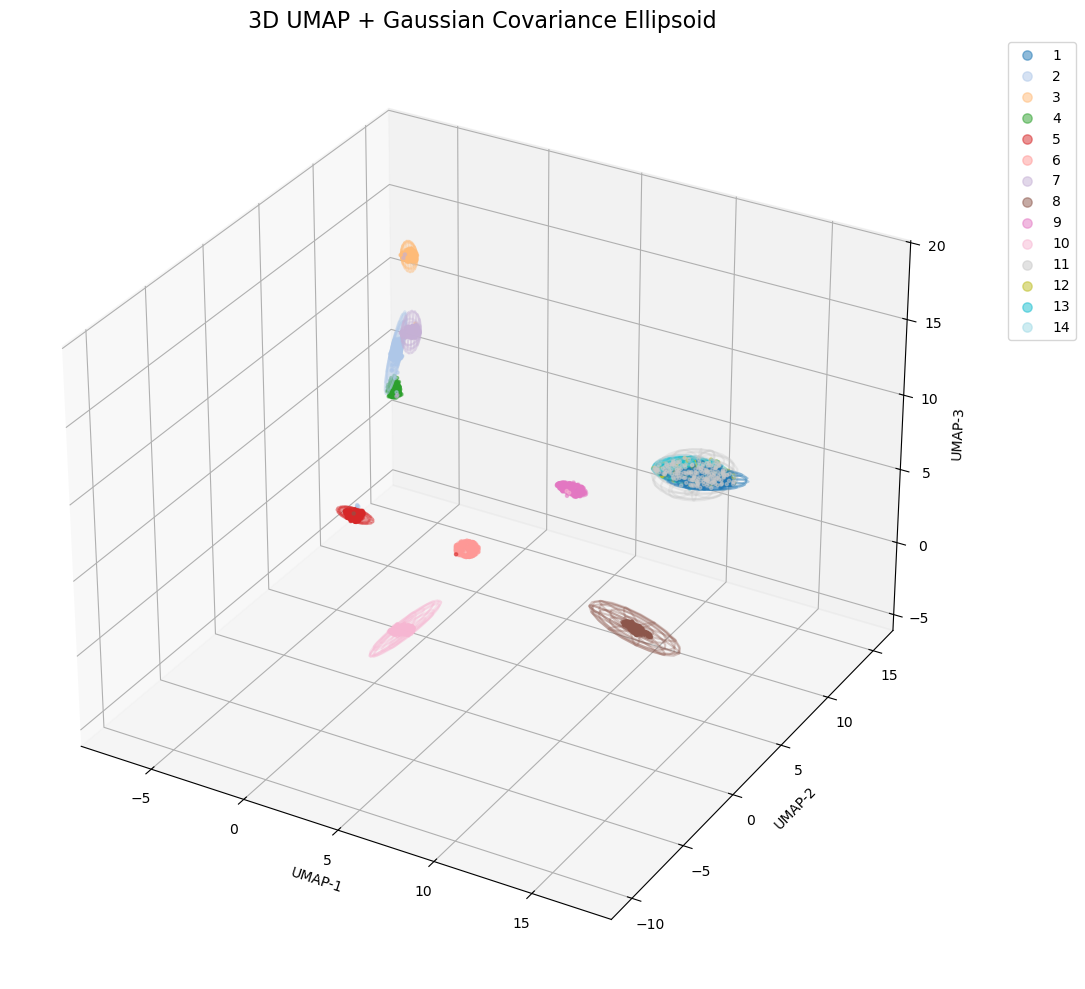

📁 3D UMAP + 椭球图已保存: /home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/UMAP/UMAP_CWT_covariance_ellipse_3D.png


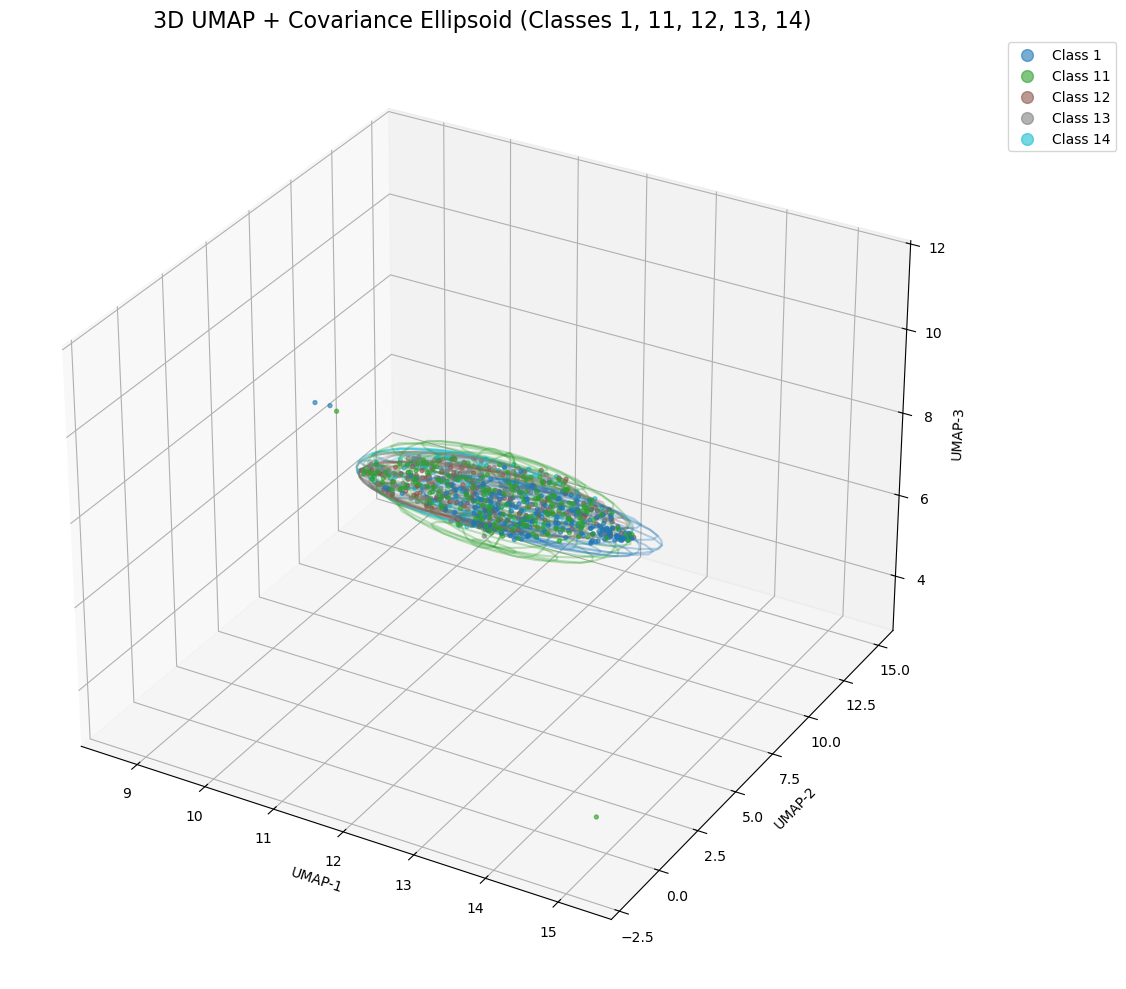

📁 已保存 1/11/12/13/14 五类 3D 图: /home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/UMAP/UMAP_CWT_covariance_ellipse_3D_selected_1_11_12_13_14.png


In [3]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
import os

# ====================== 1. 路径 ======================
train_path = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/train/train_CWT.csv"
val_path   = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/val/val_CWT.csv"
test_path  = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/test/test_CWT.csv"

save_fig = "/home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/UMAP/UMAP_CWT_covariance_ellipse_3D.png"
os.makedirs(os.path.dirname(save_fig), exist_ok=True)

# ====================== 2. 读取数据 ======================
df = pd.concat([
    pd.read_csv(train_path),
    pd.read_csv(val_path),
    pd.read_csv(test_path)
], axis=0).reset_index(drop=True)

# ====================== 3. 特征与标签 ======================
feature_cols = df.columns[1:-1]  # 第一列不要
label_col = df.columns[-1]

X = df[feature_cols].values
y = df[label_col].values
classes = np.unique(y)

# ====================== 4. UMAP (3D) ======================
print("🔍 正在进行 3D UMAP 降维 ...")
reducer = umap.UMAP(n_neighbors=25, min_dist=0.1, n_components=3, random_state=42)
embedding = reducer.fit_transform(X)
print("UMAP 完成：", embedding.shape)

# ====================== 5. 3D 协方差椭球函数 ======================
def plot_cov_ellipsoid(ax, cov, mean, color, nstd=2.0):
    """
    在 3D 中根据 3x3 协方差矩阵绘制椭球
    """
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # 椭球半径
    rx, ry, rz = nstd * np.sqrt(eigvals)

    # 球面参数
    u = np.linspace(0, 2*np.pi, 20)
    v = np.linspace(0, np.pi, 20)

    x = rx * np.outer(np.cos(u), np.sin(v))
    y = ry * np.outer(np.sin(u), np.sin(v))
    z = rz * np.outer(np.ones_like(u), np.cos(v))

    # 旋转
    E = np.stack([x, y, z], axis=-1)
    E = E @ eigvecs.T

    # 平移
    Xp = E[..., 0] + mean[0]
    Yp = E[..., 1] + mean[1]
    Zp = E[..., 2] + mean[2]

    ax.plot_wireframe(Xp, Yp, Zp, rstride=2, cstride=2, color=color, alpha=0.3)

# ====================== 6. 绘制 3D 图像 ======================
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.tab20(np.linspace(0, 1, len(classes)))

for cls, color in zip(classes, colors):
    idx = (y == cls)
    pts = embedding[idx]

    ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2],
               s=5, color=color, alpha=0.5, label=str(cls))

    # 类内协方差
    mean = pts.mean(axis=0)
    cov = np.cov(pts.T)

    # 添加椭球
    plot_cov_ellipsoid(ax, cov, mean, color)

ax.set_title("3D UMAP + Gaussian Covariance Ellipsoid", fontsize=16)
ax.set_xlabel("UMAP-1")
ax.set_ylabel("UMAP-2")
ax.set_zlabel("UMAP-3")
ax.legend(markerscale=3, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.savefig(save_fig, dpi=300)
plt.show()

print(f"📁 3D UMAP + 椭球图已保存: {save_fig}")

# ====================== 7. 单独绘制类别 1,11,12,13,14 ======================
selected_classes = [1, 11, 12, 13, 14]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

sel_colors = plt.cm.tab10(np.linspace(0, 1, len(selected_classes)))

for cls, color in zip(selected_classes, sel_colors):
    idx = (y == cls)
    pts = embedding[idx]

    ax.scatter(
        pts[:, 0], pts[:, 1], pts[:, 2],
        s=8, color=color, alpha=0.6, label=f"Class {cls}"
    )

    # 类内均值 & 协方差
    mean = pts.mean(axis=0)
    cov = np.cov(pts.T)

    # 添加椭球
    plot_cov_ellipsoid(ax, cov, mean, color)

ax.set_title("3D UMAP + Covariance Ellipsoid (Classes 1, 11, 12, 13, 14)", fontsize=16)
ax.set_xlabel("UMAP-1")
ax.set_ylabel("UMAP-2")
ax.set_zlabel("UMAP-3")
ax.legend(markerscale=3, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()

save_fig_sel = "/home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/UMAP/UMAP_CWT_covariance_ellipse_3D_selected_1_11_12_13_14.png"
plt.savefig(save_fig_sel, dpi=300)
plt.show()

print(f"📁 已保存 1/11/12/13/14 五类 3D 图: {save_fig_sel}")



# 频域特征分析

数据加载完成：
Train: (1639, 126), Val: (272, 126), Test: (819, 126)
All:   (2730, 126)
特征维度（归一化前）：(2730, 125), 类别数：14
归一化完成。

===== 特征增强建议（归一化后）=====
         Feature   FisherScore  EnergyRatio    Action
0   window_start    338.417411     0.008162  Suppress
1     ch1_scale0  26428.940715     0.008205      Keep
2     ch1_scale1  19511.754724     0.008212      Keep
3     ch1_scale2  16759.948795     0.008202      Keep
4     ch1_scale3  15377.742154     0.008235      Keep
5     ch1_scale4  12163.504798     0.008226      Keep
6     ch1_scale5  10475.538705     0.008217      Keep
7     ch1_scale6   9501.078958     0.008200      Keep
8     ch1_scale7   8978.982139     0.008208      Keep
9     ch1_scale8   8135.033555     0.008219      Keep
10    ch1_scale9   6699.073590     0.008224      Keep
11   ch1_scale10   5889.904755     0.008225      Keep
12   ch1_scale11   5724.835502     0.008234      Keep
13   ch1_scale12   5771.425083     0.008225      Keep
14   ch1_scale13   5830.930420     0.008212   

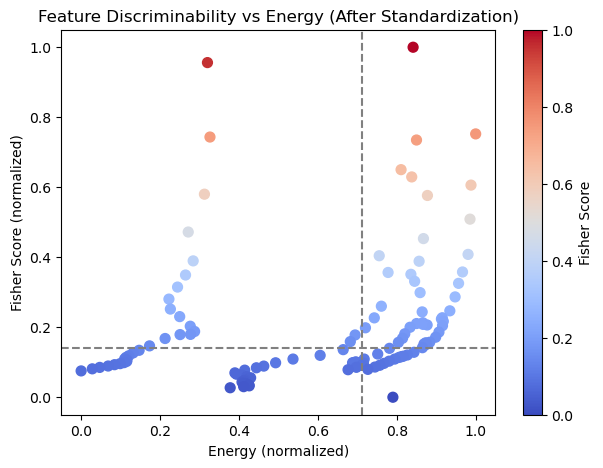

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt

# ===========================================================
# 你的文件路径
# ===========================================================
train_path = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/train/train_CWT.csv"
val_path   = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/val/val_CWT.csv"
test_path  = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/test/test_CWT.csv"

# ===========================================================
# 1. 读取 CSV
# ===========================================================
df_train = pd.read_csv(train_path)
df_val   = pd.read_csv(val_path)
df_test  = pd.read_csv(test_path)

df_all = pd.concat([df_train, df_val, df_test], ignore_index=True)

print("数据加载完成：")
print(f"Train: {df_train.shape}, Val: {df_val.shape}, Test: {df_test.shape}")
print(f"All:   {df_all.shape}")

# ===========================================================
# 2. 分离特征 & 标签
# ===========================================================
feature_cols = df_all.columns[:-1]     # 最后一列是 label
label_col    = df_all.columns[-1]

X_raw = df_all[feature_cols].values
y     = df_all[label_col].values

print(f"特征维度（归一化前）：{X_raw.shape}, 类别数：{len(np.unique(y))}")

# ===========================================================
# 3. 列 z-score 归一化（StandardScaler）
# ===========================================================
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)    # 用全部数据归一化（若严格可用 train 来 fit）

print("归一化完成。")

# ===========================================================
# 4. Fisher Score（区分力计算）
# ===========================================================
F_values, p_values = f_classif(X, y)

# ===========================================================
# 5. 能量占比（归一化后也可以比较）
# ===========================================================
energy = np.mean(np.abs(X), axis=0)
energy_ratio = energy / np.sum(energy)

# ===========================================================
# 6. 合成 DataFrame
# ===========================================================
df = pd.DataFrame({
    "Feature": feature_cols,
    "FisherScore": F_values,
    "Energy": energy,
    "EnergyRatio": energy_ratio
})

# 统一归一化用于可视化
df["Fisher_norm"] = (df["FisherScore"] - df["FisherScore"].min()) / (df["FisherScore"].max() - df["FisherScore"].min())
df["Energy_norm"] = (df["Energy"] - df["Energy"].min()) / (df["Energy"].max() - df["Energy"].min())

# ===========================================================
# 7. 自动增强/削弱判断
# ===========================================================
fs_thr = df["Fisher_norm"].median()
en_thr = df["Energy_norm"].median()

def decide(row):
    if row["Fisher_norm"] > fs_thr and row["Energy_norm"] < en_thr:
        return "Enhance"
    elif row["Fisher_norm"] < fs_thr and row["Energy_norm"] > en_thr:
        return "Suppress"
    else:
        return "Keep"

df["Action"] = df.apply(decide, axis=1)

print("\n===== 特征增强建议（归一化后）=====")
print(df[["Feature", "FisherScore", "EnergyRatio", "Action"]].head(20))

# ===========================================================
# 8. 可视化（能量 vs 区分力）
# ===========================================================
plt.figure(figsize=(7,5))
plt.scatter(df["Energy_norm"], df["Fisher_norm"], c=df["Fisher_norm"], cmap="coolwarm", s=50)

plt.axvline(en_thr, color='gray', linestyle='--')
plt.axhline(fs_thr, color='gray', linestyle='--')

plt.xlabel("Energy (normalized)")
plt.ylabel("Fisher Score (normalized)")
plt.title("Feature Discriminability vs Energy (After Standardization)")
plt.colorbar(label="Fisher Score")
plt.show()


In [4]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler

# ======================================================
# ① 你的 CWT 数据路径（你给的路径）
# ======================================================
train_path = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/train/train_CWT.csv"
val_path   = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/val/val_CWT.csv"
test_path  = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/test/test_CWT.csv"

# ======================================================
# ② 加载 CSV
# ======================================================
df_train = pd.read_csv(train_path)
df_val   = pd.read_csv(val_path)
df_test  = pd.read_csv(test_path)

df_all = pd.concat([df_train, df_val, df_test], ignore_index=True)

print("数据加载完成：")
print(f"Train: {df_train.shape}, Val: {df_val.shape}, Test: {df_test.shape}")
print(f"All:   {df_all.shape}")

# ======================================================
# ③ 分离特征 & 标签（忽略第一列 window_start）
# ======================================================

# 原：feature_cols = df_all.columns[:-1]
# 改：跳过第一列，用 1:-1
feature_cols = df_all.columns[1:-1]   # 1 开始，最后一列是 label
label_col    = df_all.columns[-1]

# 提取特征（不包含 window_start）
X_raw = df_all[feature_cols].values

y     = df_all[label_col].values

# 标签从 1–14 → 0–13
y = y - 1

y     = df_all[label_col].values

# !!! 必须把标签从 1–14 映射为 0–13
y = y - 1   

# 再检查一下
print("标签唯一值：", np.unique(y))
print("最大标签：", np.max(y))
print("最小标签：", np.min(y))


print(f"特征维度（归一化前）：{X_raw.shape}, 类别数：{len(np.unique(y))}")

# ======================================================
# ④ 特征归一化（列 z-score）
# ======================================================
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

print("归一化完成。")

# 转为 Tensor
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# ======================================================
# ⑤ 切分训练 / 验证集（80/20）
# ======================================================
num_samples = len(X_tensor)
idx = torch.randperm(num_samples)
train_size = int(0.8 * num_samples)

train_idx = idx[:train_size]
val_idx   = idx[train_size:]

train_dataset = TensorDataset(X_tensor[train_idx], y_tensor[train_idx])
val_dataset   = TensorDataset(X_tensor[val_idx],   y_tensor[val_idx])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=256, shuffle=False)

print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}")

# ======================================================
# ⑥ 定义可学习频带权重模型
# ======================================================
class BandWeightedClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()

        # 可学习“每个 CWT 频带”的权重（核心！）
        self.band_weights = nn.Parameter(torch.ones(input_dim))

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = x * self.band_weights   # 自动频带增强
        return self.classifier(x)

model = BandWeightedClassifier(input_dim=X.shape[1],
                               num_classes=len(np.unique(y)))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# ======================================================
# ⑦ 训练 & 验证函数
# ======================================================
def train_one_epoch():
    model.train()
    total_loss, correct = 0, 0
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        optimizer.zero_grad()
        logits = model(batch_x)
        loss = criterion(logits, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * len(batch_x)
        pred = logits.argmax(dim=1)
        correct += (pred == batch_y).sum().item()

    return total_loss / len(train_dataset), correct / len(train_dataset)

def validate():
    model.eval()
    total_loss, correct = 0, 0
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            logits = model(batch_x)
            loss = criterion(logits, batch_y)

            total_loss += loss.item() * len(batch_x)
            pred = logits.argmax(dim=1)
            correct += (pred == batch_y).sum().item()

    return total_loss / len(val_dataset), correct / len(val_dataset)

# ======================================================
# ⑧ 正式训练（带最优模型捕获）
# ======================================================
EPOCHS = 200

best_val_acc = 0.0
best_state_dict = None

for epoch in range(1, EPOCHS + 1):
    train_loss, train_acc = train_one_epoch()
    val_loss, val_acc = validate()

    # 记录最优模型
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_state_dict = {
            "model": model.state_dict(),
            "epoch": epoch,
            "val_acc": val_acc
        }

    print(f"[Epoch {epoch}/{EPOCHS}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

# ======================================================
# ⑨ 加载最优参数并输出最佳权重
# ======================================================
print("\n============================")
print("   加载最优验证准确率模型参数")
print("============================")
print(f"最佳 Epoch = {best_state_dict['epoch']}")
print(f"最佳验证准确率 = {best_state_dict['val_acc']:.4f}")

# 加载最优参数
model.load_state_dict(best_state_dict["model"])

# 打印可学习频带权重
print("\n===== 最优模型的频带权重 =====")
best_weights = model.band_weights.detach().cpu().numpy()

for i, w in enumerate(best_weights):
    print(f"{feature_cols[i]}: {w:.4f}")



数据加载完成：
Train: (1639, 126), Val: (272, 126), Test: (819, 126)
All:   (2730, 126)
标签唯一值： [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
最大标签： 13
最小标签： 0
特征维度（归一化前）：(2730, 124), 类别数：14
归一化完成。
Train: 2184, Val: 546
[Epoch 1/200] Train Loss: 1.9637, Train Acc: 0.2962 | Val Loss: 1.5355, Val Acc: 0.3864
[Epoch 2/200] Train Loss: 1.4635, Train Acc: 0.4469 | Val Loss: 1.3235, Val Acc: 0.5513
[Epoch 3/200] Train Loss: 1.2698, Train Acc: 0.6012 | Val Loss: 1.1485, Val Acc: 0.6795
[Epoch 4/200] Train Loss: 1.0994, Train Acc: 0.6488 | Val Loss: 0.9926, Val Acc: 0.7088
[Epoch 5/200] Train Loss: 0.9603, Train Acc: 0.6923 | Val Loss: 0.8850, Val Acc: 0.7253
[Epoch 6/200] Train Loss: 0.8610, Train Acc: 0.7070 | Val Loss: 0.8107, Val Acc: 0.7491
[Epoch 7/200] Train Loss: 0.7750, Train Acc: 0.7221 | Val Loss: 0.7492, Val Acc: 0.7344
[Epoch 8/200] Train Loss: 0.7306, Train Acc: 0.7289 | Val Loss: 0.6880, Val Acc: 0.7619
[Epoch 9/200] Train Loss: 0.6928, Train Acc: 0.7276 | Val Loss: 0.6628, Val Acc: 0.7729